In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import sklearn
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings("ignore")#To ignore warnings


In [4]:
from sklearn.datasets import load_iris
iris= load_iris()

In [5]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
X = iris.data[:, 2:]
y = iris.target

print(X)
print(y)

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

In [9]:
# Splitting the model for training and testing the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#to display the shape of train and test set
print("X_train:",X_train.shape)
print('Y_train:',y_train.shape)
print("X_test:",X_test.shape)
print('y_test:',y_test.shape)

X_train: (112, 2)
Y_train: (112,)
X_test: (38, 2)
y_test: (38,)


[Text(167.4, 163.07999999999998, 'X[1] <= 0.8\ngini = 0.666\nsamples = 112\nvalue = [35, 39, 38]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.5\nsamples = 77\nvalue = [0, 39, 38]')]

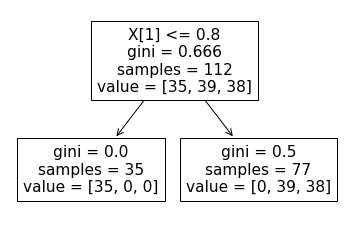

In [10]:
DecisionTree_clf1 = DecisionTreeClassifier(criterion='gini',min_samples_split=1.0,max_depth=2)
DecisionTree_clf1.fit(X_train, y_train)
y_pred1 = DecisionTree_clf1.predict(X_test)

tree.plot_tree(DecisionTree_clf1)

In [11]:
# Calculating performance metrics accuracy,and classification report
print('Accuracy of decision tree model is',accuracy_score(y_test,y_pred1))

Accuracy of decision tree model is 0.6842105263157895


[Text(133.92000000000002, 181.2, 'X[0] <= 2.45\ngini = 0.666\nsamples = 112\nvalue = [35, 39, 38]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[0] <= 4.75\ngini = 0.5\nsamples = 77\nvalue = [0, 39, 38]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.21\nsamples = 42\nvalue = [0, 5, 37]')]

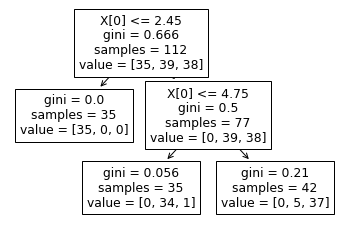

In [12]:
DecisionTree_clf2 = DecisionTreeClassifier(criterion='gini',min_samples_split=0.5)
DecisionTree_clf2.fit(X_train, y_train)
y_pred2 = DecisionTree_clf2.predict(X_test)

tree.plot_tree(DecisionTree_clf2)

In [13]:
# Calculating performance metrics accuracy,calssification report and classification report
print('Accuracy of decision tree model is',accuracy_score(y_test,y_pred2))

Accuracy of decision tree model is 0.9736842105263158


# Here we can also observe that pruning lowers the accuracy aswell, so we should do pruning for complex leafs and suitable data.

## From the above decision tree model classifications we can see that the change in split has increased the accuracy of the model from 0.6842 to 0.9736

In [14]:
import warnings
warnings.filterwarnings('ignore')
print('Classification Report:') 
print(f"{classification_report(y_test,y_pred1)}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.48      1.00      0.65        11
           2       0.00      0.00      0.00        12

    accuracy                           0.68        38
   macro avg       0.49      0.67      0.55        38
weighted avg       0.53      0.68      0.58        38



In [15]:
print('Confusion Matrix:') 
print(f"{confusion_matrix(y_test,y_pred1)}")

Confusion Matrix:
[[15  0  0]
 [ 0 11  0]
 [ 0 12  0]]


In [16]:
import warnings
warnings.filterwarnings('ignore')
print('Classification Report:') 
print(f"{classification_report(y_test,y_pred2)}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [17]:
print('Confusion Matrix:') 
print(f"{confusion_matrix(y_test,y_pred2)}")

Confusion Matrix:
[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]


# Bagging Ensembles

In [18]:
from sklearn.ensemble import BaggingClassifier

bagagging_clf = BaggingClassifier(DecisionTreeClassifier(random_state=40),max_samples=5, random_state=40)
bagagging_clf.fit(X_train, y_train)
y_pred = bagagging_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9736842105263158


## After using bagging classifier ensemble techniques the accuracy score is still the same with 0.9736.

In [19]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.2, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)



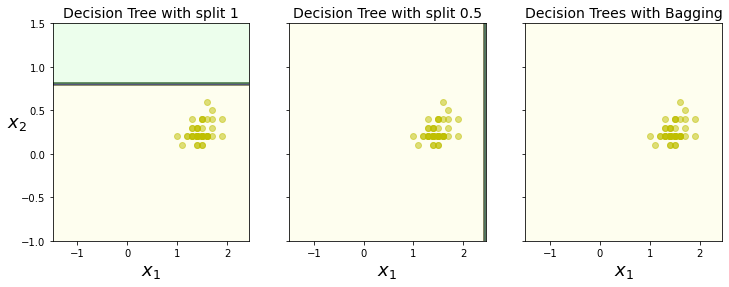

In [20]:
fix, axes = plt.subplots(ncols=3, figsize=(12,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(DecisionTree_clf1, X, y)
plt.title("Decision Tree with split 1", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(DecisionTree_clf2, X, y)
plt.title("Decision Tree with split 0.5", fontsize=14)
plt.ylabel("")
plt.sca(axes[2])
plot_decision_boundary(bagagging_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("")
plt.show()

# Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=3, max_leaf_nodes=16, random_state=42)
RF_model.fit(X_train, y_train)

y_pred_rf = RF_model.predict(X_test)

accuracy_score(y_test, y_pred_rf)

1.0

In [22]:
rf_clf = RandomForestClassifier(n_estimators=500, random_state=40)
rf_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rf_clf.feature_importances_):
    print(name, score)

rf_clf.feature_importances_

sepal length (cm) 0.0991356374197223
sepal width (cm) 0.026347649815575597
petal length (cm) 0.4266968256966252
petal width (cm) 0.44781988706807696


array([0.09913564, 0.02634765, 0.42669683, 0.44781989])

# AdaBoost Classifer

In [23]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

Adaboost_model = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=3,
     learning_rate=0.5)

Adaboost_model.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=3)

In [24]:
y_pred_ada = Adaboost_model.predict(X_test)

Adaboost_model.score(X_test,y_pred_ada)

1.0

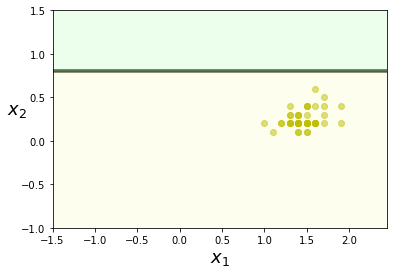

In [25]:
plot_decision_boundary(Adaboost_model, X, y)

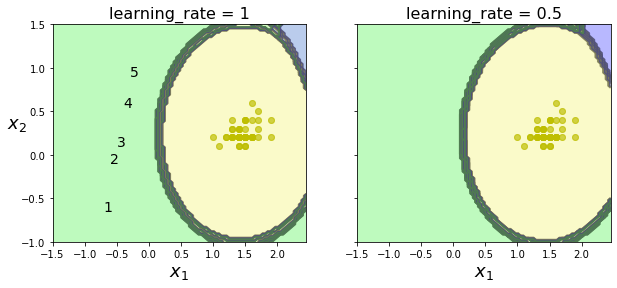

In [26]:
m = len(X_train)

fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
for subplot, learning_rate in ((0, 1), (1, 0.5)):
    sample_weights = np.ones(m)
    plt.sca(axes[subplot])
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.05, gamma=1, random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
        y_pred = svm_clf.predict(X_train)
        sample_weights[y_pred != y_train] *= (1 + learning_rate)
        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)
    if subplot == 0:
        plt.text(-0.7, -0.65, "1", fontsize=14)
        plt.text(-0.6, -0.10, "2", fontsize=14)
        plt.text(-0.5,  0.10, "3", fontsize=14)
        plt.text(-0.4,  0.55, "4", fontsize=14)
        plt.text(-0.3,  0.90, "5", fontsize=14)
    else:
        plt.ylabel("")

plt.show()

# Gradient Boosting Classifier

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=3, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)

gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
gb_clf.score(X_test,y_pred_gb)

1.0

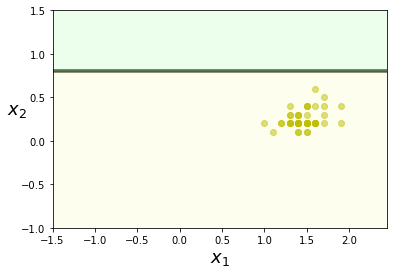

In [28]:
plot_decision_boundary(gb_clf, X, y)

# Feature Importance

In [29]:
from sklearn.ensemble import RandomForestClassifier
Ranf_model = RandomForestClassifier(n_estimators=3, max_leaf_nodes=16, random_state=42)
Ranf_model.fit(X_train, y_train)
y_pred_rf = Ranf_model.predict(X_test)
accuracy_score(y_test, y_pred_rf)
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

rnd_clf.feature_importances_

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])

In [30]:
#Quadratic training set + noise
np.random.seed(42)
m = 150
X = np.random.rand(m, 1)
y = 4 * (X - 0.25) ** 2
y = y + np.random.randn(m, 1) / 10

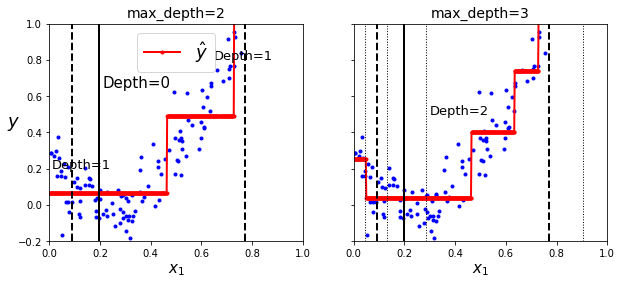

In [31]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=15)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

# save_fig("tree_regression_plot")
plt.show()